In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
food_data = pd.read_csv("data.csv")


print(food_data.head())

   calories                                           cautions  \
0       458                    ['WHEAT', 'SULFITES', 'FODMAP']   
1        81                                       ['SULFITES']   
2       592  ['GLUTEN', 'EGGS', 'MILK', 'TREE_NUTS', 'SULFI...   
3       257                               ['MILK', 'SULFITES']   
4       304                         ['EGGS', 'MILK', 'FODMAP']   

                   dietLabels         CA      CHOLE        FAT         FE  \
0  ['LOW_CARB', 'LOW_SODIUM']  29.484778   1.136626   4.178421  37.857563   
1  ['LOW_CARB', 'LOW_SODIUM']   7.349500   3.519000   0.431400   1.176800   
2              ['LOW_SODIUM']  39.991623  11.228905  29.602538  17.179772   
3                ['BALANCED']  11.129162   7.301346  20.882060   8.094524   
4                ['LOW_CARB']  19.882398   3.180228   3.665255  19.025908   

        FIBTG           K          MG          NA       PROCNT     SUGAR  \
0  141.985293  546.573355   46.546189   53.756601   563.990662  

In [ ]:
print(food_data.shape)

(49, 14)


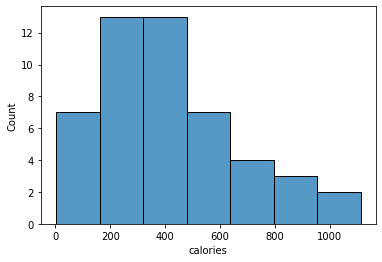

In [ ]:
#histogram plot of calories
sns.histplot(data = food_data, x="calories")
plt.show()

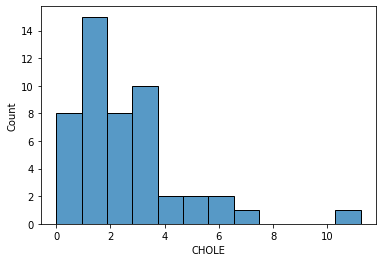

In [ ]:
#histogram plot of cholesterol
sns.histplot(data =food_data, x = "CHOLE" )
plt.show()

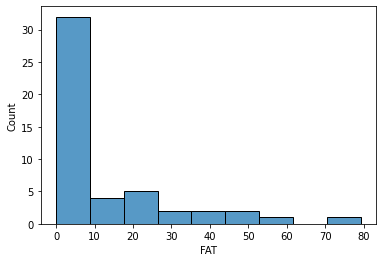

In [ ]:
#histogram plot of fat
sns.histplot(data = food_data, x = "FAT")
plt.show()

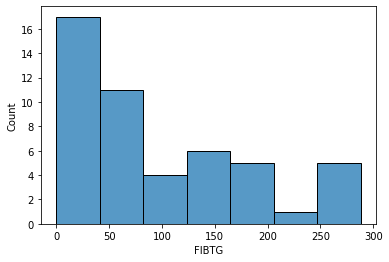

In [ ]:
#histogram plot of fiber
sns.histplot(data = food_data, x = "FIBTG")
plt.show()

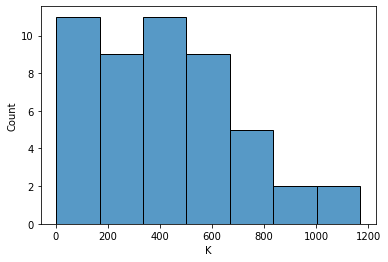

In [ ]:
#histogram plot of potassium
sns.histplot(data = food_data, x = "K")
plt.show()

In [4]:
# correlation
pd.set_option('precision', 2)
print(food_data.corr(method='pearson'))

          calories        CA  CHOLE       FAT    FE  FIBTG     K    MG    NA  \
calories      1.00  9.39e-01   0.32  2.17e-01  0.67   0.62  0.49  0.22  0.50   
CA            0.94  1.00e+00   0.30  3.38e-04  0.64   0.57  0.48  0.22  0.48   
CHOLE         0.32  3.04e-01   1.00  1.26e-01  0.04   0.01  0.21  0.40  0.66   
FAT           0.22  3.38e-04   0.13  1.00e+00 -0.23   0.07 -0.08 -0.04 -0.11   
FE            0.67  6.37e-01   0.04 -2.32e-01  1.00   0.76  0.61  0.19  0.63   
FIBTG         0.62  5.67e-01   0.01  7.26e-02  0.76   1.00  0.56  0.38  0.57   
K             0.49  4.78e-01   0.21 -8.15e-02  0.61   0.56  1.00  0.25  0.56   
MG            0.22  2.16e-01   0.40 -3.91e-02  0.19   0.38  0.25  1.00  0.58   
NA            0.50  4.85e-01   0.66 -1.12e-01  0.63   0.57  0.56  0.58  1.00   
PROCNT        0.52  5.31e-01   0.55 -1.66e-01  0.73   0.61  0.61  0.32  0.87   
SUGAR         0.69  6.63e-01   0.37 -2.30e-02  0.72   0.70  0.58  0.57  0.73   
VITC          0.24  2.44e-01   0.81  1.6

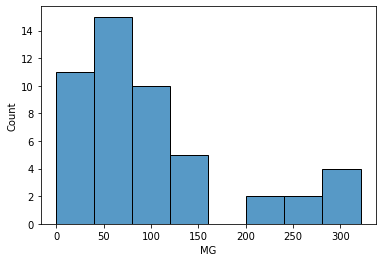

In [5]:
#hist plot of magnesium
sns.histplot(data = food_data, x = "MG")
plt.show()

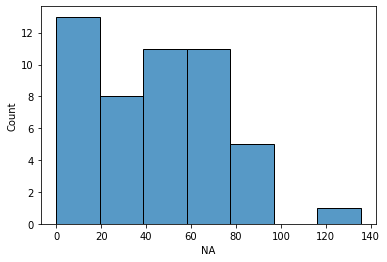

In [6]:
#histogram plot of sodium
sns.histplot(data = food_data, x = "NA")
plt.show()

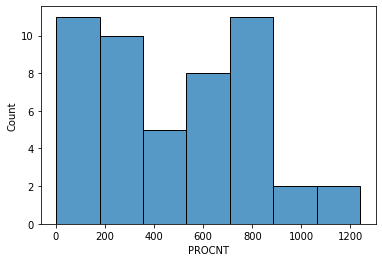

In [30]:
#histogram plot of protein
sns.histplot(data = food_data, x = "PROCNT")
plt.show()

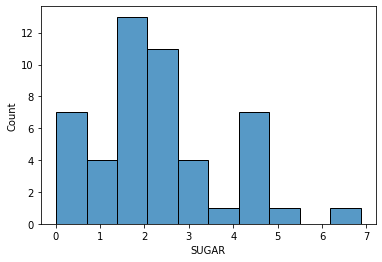

In [8]:
#histogram plot of sugar
sns.histplot(data = food_data, x = "SUGAR")
plt.show()

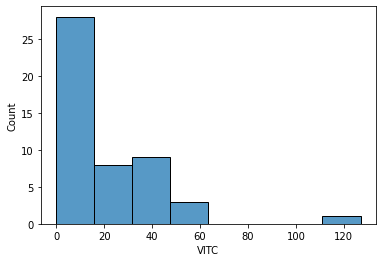

In [9]:
sns.histplot(data = food_data, x = "VITC")
plt.show()

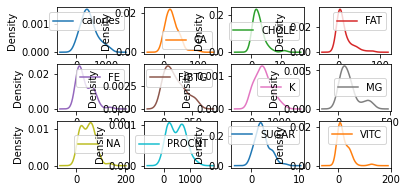

In [12]:
#Univariate density plots
food_data.plot(kind= "density", subplots = True, layout=(4,4), sharex= False)
plt.show()

In [13]:
#check skewness
skew = food_data.skew()
print(skew)

calories    0.71
CA          1.34
CHOLE       2.04
FAT         2.06
FE          1.04
FIBTG       0.73
K           0.50
MG          1.30
NA          0.54
PROCNT      0.29
SUGAR       0.81
VITC        2.36
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


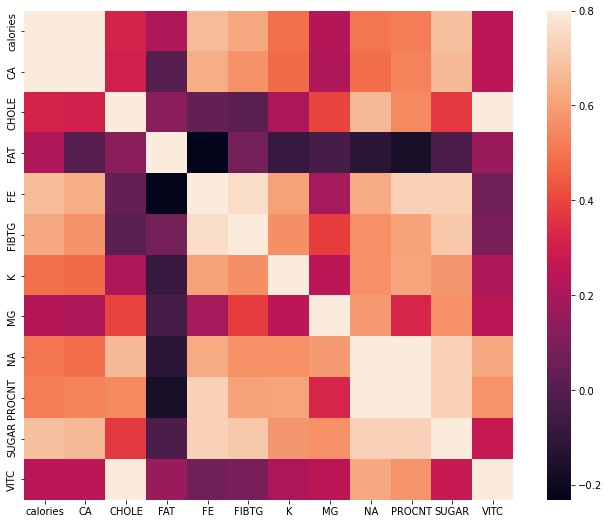

In [14]:
#correlation matrix
corrmat = food_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

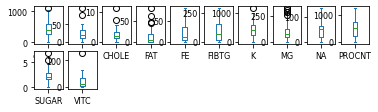

In [19]:
food_data.plot(kind='box', subplots=True, layout=(5,10), sharex=False, sharey=False, fontsize=8)
plt.show()

In [22]:
cleaned_food_data = food_data.drop(["cautions", "dietLabels"], axis =1)

In [23]:
print(cleaned_food_data.columns)

Index(['calories', 'CA', 'CHOLE', 'FAT', 'FE', 'FIBTG', 'K', 'MG', 'NA',
       'PROCNT', 'SUGAR', 'VITC'],
      dtype='object')


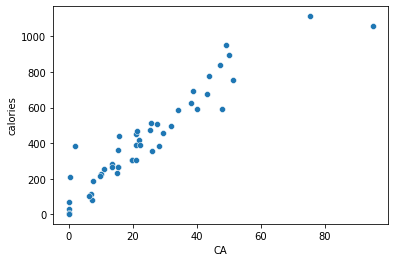

In [27]:
#scatterplot of calcium v calories
sns.scatterplot(x = "CA", y = "calories", data = food_data)
plt.show()

In [29]:

# Split-out validation dataset
X = cleaned_food_data.drop(["calories"], axis =1)
Y = cleaned_food_data["calories"]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


LR: -7143.747771 (8542.811408)
LASSO: -7303.020692 (8972.311573)
EN: -8147.680217 (11005.538611)
KNN: -58483.693667 (64512.137690)
CART: -14618.291667 (16114.639947)
SVR: -68864.873572 (66028.873698)
